In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as pre
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
# Dataset Link: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

#dataset de cedulas falsificadas e não falsificadas

print("...............Lendo e pre-processando DataSet ................")
start_time = time.time()
dataset = shuffle(pd.read_csv("data_banknote_authentication.txt"))

...............Lendo e pre-processando DataSet ................


In [3]:
dataset.columns = ["Variância da imagem Transformada por Wavelet", "Assimetria da imagem Transformada por Wavelet",
                "Curtose da imagem Transformada por Wavelet", "Entropia da imagem", "Classe"]

# Mudando os valores da classe para -1 e 1 para a função de ativação tanh
dataset.loc[dataset['Classe'] == 1, 'Classe'] = -1
dataset.loc[dataset['Classe'] == 0, 'Classe'] = 1
x = dataset[["Variância da imagem Transformada por Wavelet", "Assimetria da imagem Transformada por Wavelet", "Curtose da imagem Transformada por Wavelet", "Entropia da imagem"]]
y = dataset[['Classe']]

dataset


,Variância da imagem Transformada por Wavelet,Assimetria da imagem Transformada por Wavelet,Curtose da imagem Transformada por Wavelet,Entropia da imagem,Classe
256,2.20340,5.994700,0.53009,0.849980,1
285,1.34190,-4.422100,8.09000,-1.734900,1
713,2.55590,3.360500,2.03210,0.268090,1
103,4.20270,0.227610,0.96108,0.972820,1
373,-1.50550,0.070346,6.86810,-0.506480,1
...,...,...,...,...,...
1357,-1.01160,-0.190380,-0.90597,0.003003,-1
740,3.58620,-3.095700,2.80930,0.244810,1
931,0.26517,2.406600,-2.84160,-0.599580,-1
950,-1.69360,2.785200,-2.18350,-1.927600,-1


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=4)
print('Shape of X_Train : ', x_train.shape)
print('Shape of Train class : ', y_train.shape)
print('Shape of X_test : ', x_test.shape)
print('Shape of Test class : ', y_test.shape)


Shape of X_Train :  (1096, 4)
Shape of Train class :  (1096, 1)
Shape of X_test :  (275, 4)
Shape of Test class :  (275, 1)


In [5]:
# Normalizando os dados usando o Standard Scaler Fit Transform
x_train = pre.StandardScaler().fit_transform(x_train)
x_test = pre.StandardScaler().fit_transform(x_test)

# Convertendo o dataframe do pandas para array numpy para garantir compatibilidade
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

end_time = time.time()
total_time = end_time - start_time

print("Custo de Tempo para Pré-processamento e Leitura do Conjunto de Dados: %f segundos \n " % total_time)


Custo de Tempo para Pré-processamento e Leitura do Conjunto de Dados: 57.300029 segundos 
 


In [7]:
#convertendo para array
# Hyperbolic Tangent Activation function
def hyperbolic_tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

# Hyperbolic derivative
def derivative_hyperbolic(x):
  return 1 - hyperbolic_tanh(x) * hyperbolic_tanh(x)

In [8]:
print("............... Inicializando hiperparâmetros ................")
start_time = time.time()
# Definindo Hiperparâmetros
np.random.seed(10)
inp = 4
hd = 6
out = 1

actual_out_size = y_train.size
epochs = 10000
eta = 0.001
alpha = 0.7
print("............... Definindo 4 pesos para camadas ocultas ................")
# Definindo pesos aleatórios para 4 camadas ocultas
w1_l1 = np.random.randn(inp, hd)
w2_l2 = np.random.randn(hd, hd)
w3_l3 = np.random.randn(hd, hd)
w4_l4 = np.random.randn(hd, hd)
out_w = np.random.randn(hd, out)

acc_list = []

end_time = time.time()
total_time = end_time - start_time
print("Custo de Tempo para Definir Hiperparâmetros: %f segundos \n " % total_time)


............... Inicializando hiperparâmetros ................
............... Definindo 4 pesos para camadas ocultas ................
Custo de Tempo para Definir Hiperparâmetros: 0.000576 segundos 
 


............... Treinando Algoritmo de Retropropagação ................
Precisão do Treinamento: 94.0 %
Custo de Tempo para Treinar o Algoritmo: 17.965641 segundos 
 
............... Plotando Curva de Precisão ................


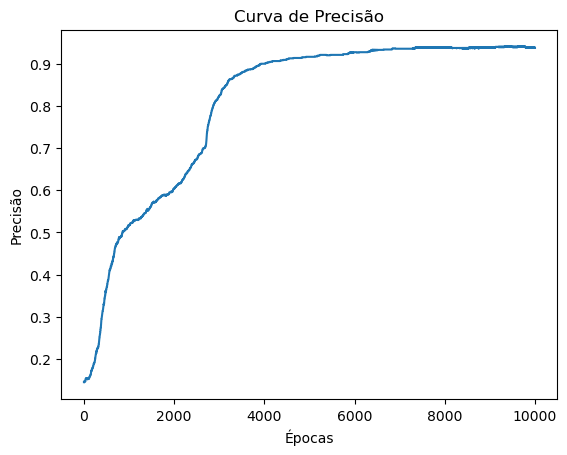

In [11]:
print("............... Treinando Algoritmo de Retropropagação ................")
start_time = time.time()
for i in range(epochs):
    # Propagação para frente para 4 camadas ocultas chamando a função de ativação
    l1 = np.dot(x_train, w1_l1)
    l1_out = hyperbolic_tanh(l1)

    l2 = np.dot(l1_out, w2_l2)
    l2_out = hyperbolic_tanh(l2)

    l3 = np.dot(l2_out, w3_l3)
    l3_out = hyperbolic_tanh(l3)

    l4 = np.dot(l3_out, w4_l4)
    l4_out = hyperbolic_tanh(l4)

    output = np.dot(l4_out, out_w)
    final_out = hyperbolic_tanh(output)

    # Calcular precisão
    final_out = final_out.round()
    calc_acc = (final_out == y_train).sum()
    acc = calc_acc / actual_out_size
    acc_list.append(acc)

    # Retropropagação para 4 camadas ocultas
    final_err = final_out - y_train
    final_sigmoid_derivative = final_err * derivative_hyperbolic(final_out)

    l4_err = np.dot(final_sigmoid_derivative, out_w.T)
    l4_derivative = l4_err * derivative_hyperbolic(l4_out)

    l3_err = np.dot(l4_derivative, w4_l4.T)
    l3_derivative = l3_err * derivative_hyperbolic(l3_out)

    l2_err = np.dot(l3_derivative, w3_l3.T)
    l2_derivative = l2_err * derivative_hyperbolic(l2_out)

    l1_err = np.dot(l2_derivative, w2_l2.T)
    l1_derivative = l1_err * derivative_hyperbolic(l1_out)

    # Dividir pesos conforme o tamanho do output
    output_weights = np.dot(l4_out.T, final_sigmoid_derivative) / actual_out_size
    weights4 = np.dot(l3_out.T, l4_derivative) / actual_out_size
    weights3 = np.dot(l2_out.T, l3_derivative) / actual_out_size
    weights2 = np.dot(l1_out.T, l2_derivative) / actual_out_size
    weights1 = np.dot(x_train.T, l1_derivative) / actual_out_size

    out_w -= eta * alpha * output_weights
    w4_l4 -= eta * alpha * weights4
    w3_l3 -= eta * alpha * weights3
    w2_l2 -= eta * alpha * weights2
    w1_l1 -= eta * alpha * weights1

print("Precisão do Treinamento: "+str(round(acc_list[-1],2) * 100) + " %")
end_time = time.time()
total_time = end_time - start_time
print("Custo de Tempo para Treinar o Algoritmo: %f segundos \n " % total_time)

print("............... Plotando Curva de Precisão ................")

plt.title("Curva de Precisão")
plt.ylabel("Precisão")
plt.xlabel("Épocas")
plt.plot(acc_list)
plt.show()


In [12]:
#conjunto de teste
print()
print("............... Testando Algoritmo de Retropropagação ................")
start_time = time.time()

# Propagação para frente para 4 camadas ocultas chamando a função de ativação
l1_test = np.dot(x_test, w1_l1)
l1_out_test = hyperbolic_tanh(l1_test)

l2_test = np.dot(l1_out_test, w2_l2)
l2_out_test = hyperbolic_tanh(l2_test)

l3_test = np.dot(l2_out_test, w3_l3)
l3_out = hyperbolic_tanh(l3_test)

l4_test = np.dot(l3_out, w4_l4)
l4_out_test = hyperbolic_tanh(l4_test)

output_test = np.dot(l4_out_test, out_w)
final_out_test = hyperbolic_tanh(output_test)

# Calcular precisão
actual_out_size = y_test.size
final_out_test_acc = final_out_test.round()
calc_acc = (final_out_test_acc == y_test).sum()
acc_test = (calc_acc / actual_out_size) * 100

print("Precisão do Teste: "+str(round(acc_test,2)) + " %")
end_time = time.time()
total_time = end_time - start_time
print("Custo de Tempo para Testar o Algoritmo: %f segundos \n " % total_time)

print(final_out_test)



............... Testando Algoritmo de Retropropagação ................
Precisão do Teste: 93.82 %
Custo de Tempo para Testar o Algoritmo: 0.007419 segundos 
 
[[-0.9220461 ]
 [ 0.85974514]
 [ 0.88957471]
 [ 0.91944517]
 [ 0.92174798]
 [ 0.6362481 ]
 [-0.72615177]
 [ 0.72523045]
 [-0.91157237]
 [-0.67285699]
 [-0.92573858]
 [-0.70760588]
 [-0.92801463]
 [-0.74886029]
 [-0.9201511 ]
 [ 0.91742792]
 [ 0.05463792]
 [ 0.65918794]
 [-0.91993554]
 [ 0.91484384]
 [-0.84071057]
 [-0.92101959]
 [-0.92214961]
 [ 0.67505316]
 [-0.9072855 ]
 [ 0.47198455]
 [ 0.8124866 ]
 [-0.64699737]
 [ 0.74160021]
 [-0.94013865]
 [-0.92099033]
 [ 0.91716142]
 [-0.91899703]
 [ 0.9233324 ]
 [ 0.90217197]
 [ 0.9073238 ]
 [ 0.86692126]
 [ 0.66985878]
 [-0.4506945 ]
 [-0.7282428 ]
 [-0.91914424]
 [ 0.91597531]
 [ 0.92277329]
 [ 0.364463  ]
 [-0.77484737]
 [ 0.91865093]
 [ 0.9094422 ]
 [ 0.07503035]
 [ 0.90416474]
 [ 0.91411365]
 [-0.93433862]
 [-0.67846558]
 [ 0.91372137]
 [ 0.22193562]
 [ 0.91860681]
 [-0.75420472]
